<style>
    .center{
        display:block;
        margin:auto;
        text-align:center
    }
</style>
<marquee><img src="wall.jpg" style="height:200px;margin:20px" ><img src="bulba.png" style="height:200px;margin:20px"></marquee><br/>
<!-- <marquee direction="right"><img src="wall.jpg" style="height:100px;margin:20px" ><img src="bulba.png" style="height:100px;margin:20px"></marquee> -->
<h1 class="center"><strong>Pokemon Classification (Legendary or not)</strong></h1>

<h3 style="text-align:center">Importing the dataset</h3>

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('pokemon.csv')
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


<h3>Pie chart showing imbalance in classes</h3>

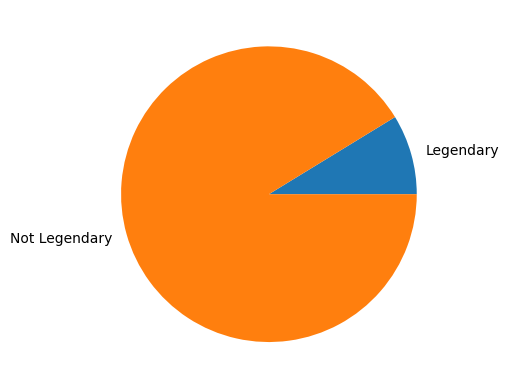

In [200]:
plt.pie([data[data['is_legendary']==1].shape[0],data[data['is_legendary']==0].shape[0]],labels=['Legendary','Not Legendary'],)
plt.show()

<h3>Checking for NaN values</h3>

In [201]:
data.isna().any()
row_nan_count = data.isna().sum(axis=0)
row_nan_count[row_nan_count!=0]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

<h3>Extracting records with missing weights and height</h3>

In [202]:
missing_rows = data[data['weight_kg'].isna()| data['height_m'].isna()]
missing_rows

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,19,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,20,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,50.0,26,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,27,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,28,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,37,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,38,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,50,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,51,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,52,50,40,90,normal,dark,NaN,1,0


<table>
    <tr>
        <td>No. of records with missing height & weight
        </td>
        <td>20
        </td>
    </tr>
    <tr>
        <td>No. of records with missing height
        </td>
        <td>20
        </td>
    </tr>
    <tr>
        <td>No. of records with missing weight
        </td>
        <td>20
        </td>
    </tr>
</table>
<br/>
Hence, pokemon whose heights are missing their weights are also missing.<br/>

Now, listing their names:

In [203]:
missing_rows['name']

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object

<h3>Manually getting the heights and weights from serebii.net</h3>

In [204]:
height=[0.3,0.7,0.7,0.65,1.1,0.6,1.1,0.2,0.7,0.4,1.1,0.4,1,1.6,0.8,1.1,6.45,1,3.5,1]
weight=[3.7,20,25,26,40,9.9,19.9,0.9,50,4.2,32,20,107,308,36,41,267.8,39.5,250,25]

missing_rows['weight_kg']=weight
missing_rows['height_m']=height
data.loc[missing_rows.index,'height_m']=missing_rows['height_m']
data.loc[missing_rows.index,'weight_kg']=missing_rows['weight_kg']
data.loc[missing_rows.index,['height_m','weight_kg']]

data.isna().any()
row_nan_count = data.isna().sum(axis=0)
print(row_nan_count)

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0


/tmp/ipykernel_10385/2087166032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows['weight_kg']=weight
/tmp/ipykernel_10385/2087166032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows['height_m']=height


In [205]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.165293,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.500874,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.088709,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,108.935857,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,63.000000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


<strong><h2>Feature Selection</h2></strong>

<h3>Manually dropping columns on which classification does not depend</h3>

In [206]:
data=data.drop(['classfication','type1','type2','name','japanese_name','abilities','percentage_male','pokedex_number'],axis=1)

<h3>Plot showing mutual information value of each attribute</h3>
<p>Greater value -> more important feature</p>

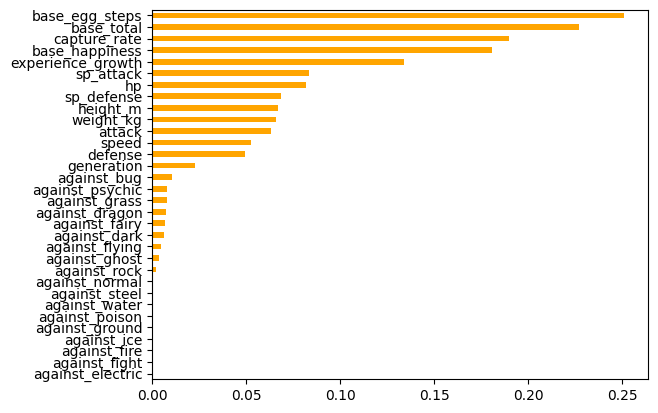

In [207]:
from sklearn.feature_selection import mutual_info_classif


y=data['is_legendary']
x=data.drop('is_legendary',axis=1)


importances=mutual_info_classif(x,y)
feature_imp=pd.Series(importances,x.columns)
feature_imp.sort_values(axis=0).plot(kind='barh',color='orange')
plt.show()

<h3>Dropping features with mutual importance value less than 0.05</h3>

In [208]:
to_drop=[i for i in x.columns if feature_imp[i]<0.05]
data.drop(to_drop,axis=1,inplace=True)
data

,attack,base_egg_steps,base_happiness,base_total,capture_rate,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,49,5120,70,318,45,1059860,0.7,45,65,65,45,6.9,0
1,62,5120,70,405,45,1059860,1.0,60,80,80,60,13.0,0
2,100,5120,70,625,45,1059860,2.0,80,122,120,80,100.0,0
3,52,5120,70,309,45,1059860,0.6,39,60,50,65,8.5,0
4,64,5120,70,405,45,1059860,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,1250000,9.2,97,107,101,61,999.9,1
797,181,30720,0,570,255,1250000,0.3,59,59,31,109,0.1,1
798,101,30720,0,570,15,1250000,5.5,223,97,53,43,888.0,1
799,107,30720,0,600,3,1250000,2.4,97,127,89,79,230.0,1


<h3>Splitting columns in Attributes(X) and Class(Y)</h3>

In [209]:
y=data['is_legendary']
x=data.drop('is_legendary',axis=1)
x

,attack,base_egg_steps,base_happiness,base_total,capture_rate,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg
0,49,5120,70,318,45,1059860,0.7,45,65,65,45,6.9
1,62,5120,70,405,45,1059860,1.0,60,80,80,60,13.0
2,100,5120,70,625,45,1059860,2.0,80,122,120,80,100.0
3,52,5120,70,309,45,1059860,0.6,39,60,50,65,8.5
4,64,5120,70,405,45,1059860,1.1,58,80,65,80,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,1250000,9.2,97,107,101,61,999.9
797,181,30720,0,570,255,1250000,0.3,59,59,31,109,0.1
798,101,30720,0,570,15,1250000,5.5,223,97,53,43,888.0
799,107,30720,0,600,3,1250000,2.4,97,127,89,79,230.0


<h2>Normalizing Data<h2>

In [210]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
normalized_x

,attack,base_egg_steps,base_happiness,base_total,capture_rate,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg
0,0.244444,0.130435,0.5,0.230000,0.166667,0.442173,0.041667,0.173228,0.298913,0.214286,0.228571,0.006801
1,0.316667,0.130435,0.5,0.375000,0.166667,0.442173,0.062500,0.232283,0.380435,0.285714,0.314286,0.012903
2,0.527778,0.130435,0.5,0.741667,0.166667,0.442173,0.131944,0.311024,0.608696,0.476190,0.428571,0.099920
3,0.261111,0.130435,0.5,0.215000,0.166667,0.442173,0.034722,0.149606,0.271739,0.142857,0.342857,0.008402
4,0.327778,0.130435,0.5,0.375000,0.166667,0.442173,0.069444,0.224409,0.380435,0.214286,0.428571,0.018904
...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.533333,1.000000,0.0,0.650000,0.087302,0.625000,0.631944,0.377953,0.527174,0.385714,0.320000,1.000000
797,0.977778,1.000000,0.0,0.650000,1.000000,0.625000,0.013889,0.228346,0.266304,0.052381,0.594286,0.000000
798,0.533333,1.000000,0.0,0.650000,0.047619,0.625000,0.375000,0.874016,0.472826,0.157143,0.217143,0.888078
799,0.566667,1.000000,0.0,0.700000,0.000000,0.625000,0.159722,0.377953,0.635870,0.328571,0.422857,0.229946


<h3>Splitting Data into training and testing data<br/>
Using <strong>stratify</strong> to maintain same ratio of each class in training and testing sets</h3>

In [211]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69,stratify=y)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (640, 12)
x_test shape: (161, 12)
y_train shape: (640,)
y_test shape: (161,)


<h3>Decision Tree Classifier on basis of entropy</h3>
It chooses the most significant feature to split the data by selecting the feature which minimizes the entropy

In [212]:
from sklearn import tree
t_model=tree.DecisionTreeClassifier(max_depth=5,criterion='entropy')
t_model.fit(x_train,y_train)
print("Tree depth : ",t_model.tree_.max_depth)

Tree depth :  3


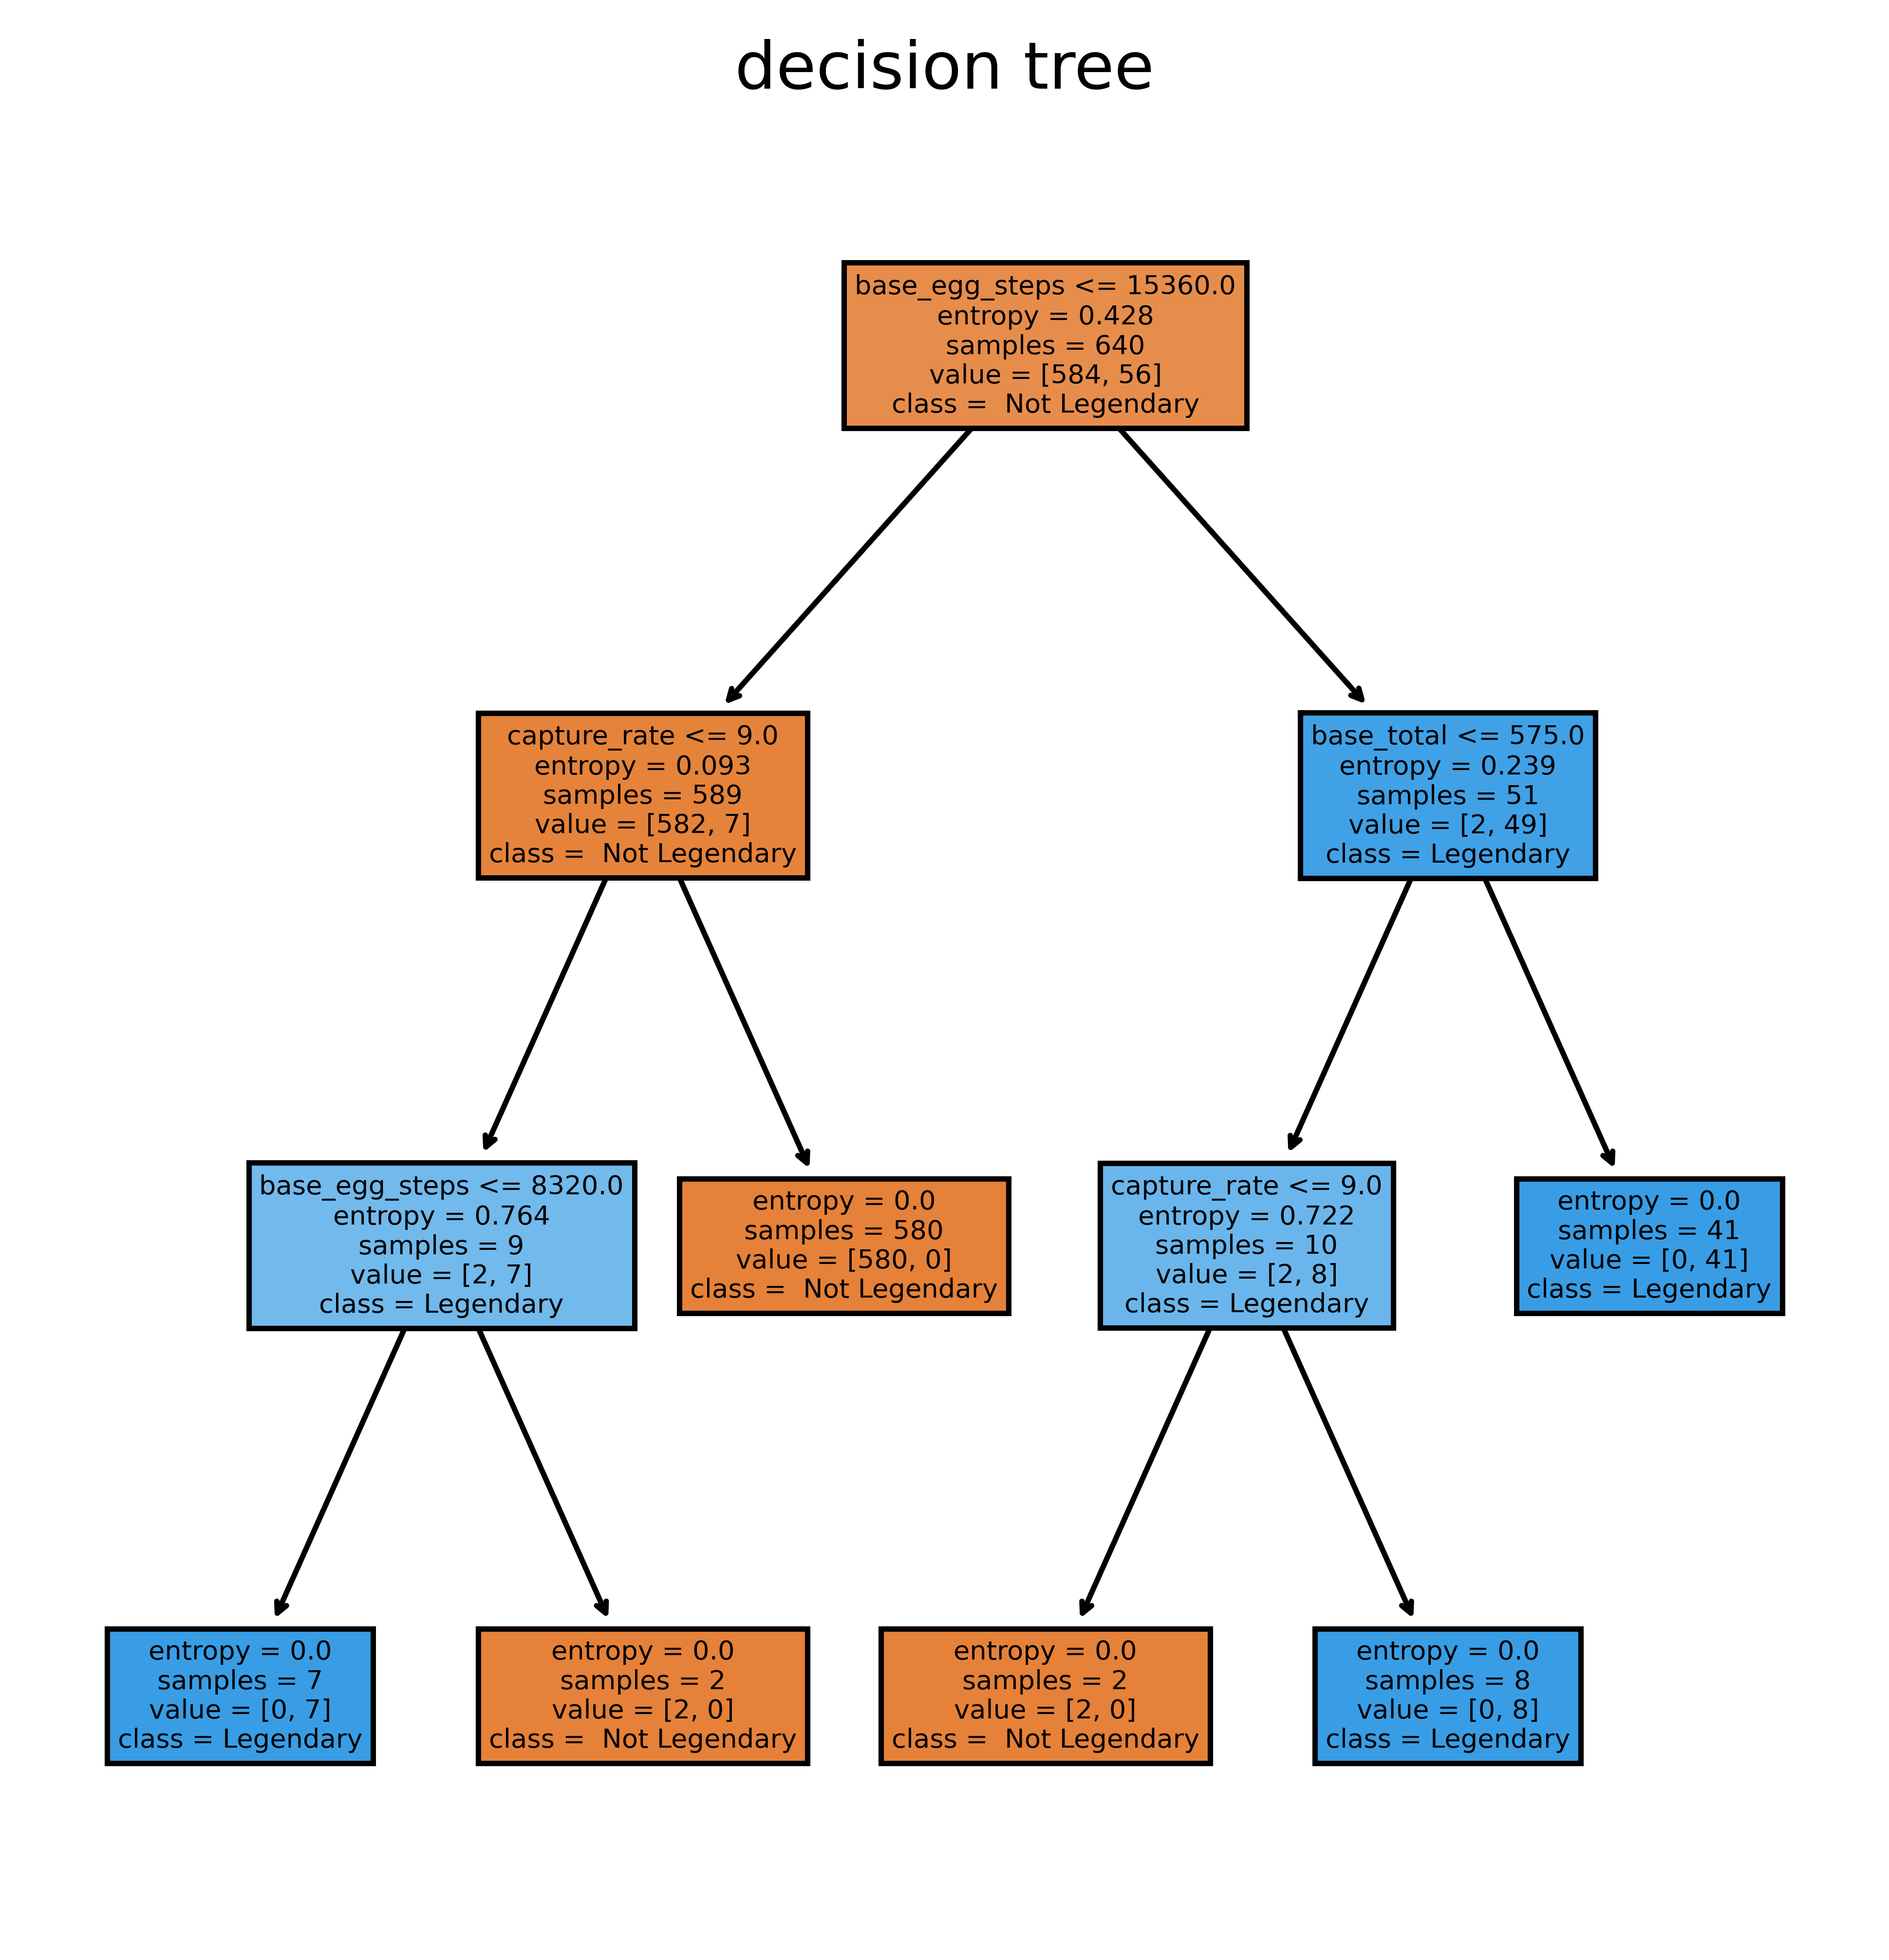

In [213]:
fig,axes = plt.subplots(nrows= 1, ncols= 1, figsize = (6,6) , dpi = 800)
tree.plot_tree(t_model,feature_names= x.columns,class_names= [' Not Legendary','Legendary'],filled= True)
plt.title("decision tree")
fig.savefig("DTREE.png")

In [214]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

y_pred = t_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print()
# Assuming you have the predicted labels in y_pred and true labels in y_true
print("Confusion Matrix : ")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix : 
[[147   0]
 [  0  14]]
